# LOAN PREDICTION
Dataset link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [45]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fouille_de_donnees/Loan prediction/train_u6lujuX_CVtuZ9i.csv')
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [46]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [48]:
# afficher la somme des valeurs manquantes par colonnes
loan_data.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# voir les types
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [50]:
# Separation des variables numeriques et categoriques
loan_cat = []
loan_num = []
for i,t in enumerate(loan_data.dtypes):
  if t == object :
    loan_cat.append(loan_data.iloc[:,i])
  else:
    loan_num.append(loan_data.iloc[:,i])

loan_cat = pd.DataFrame(loan_cat).transpose()
loan_num = pd.DataFrame(loan_num).transpose()

In [51]:
loan_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [52]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [53]:
# Pour les variables categoriques, je remplace les valeurs manquantes par la valeurs qui se repete le plus
loan_cat = loan_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [54]:
loan_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [55]:
loan_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         614 non-null    object
 2   Married        614 non-null    object
 3   Dependents     614 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  614 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [56]:
loan_cat.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [57]:
# Pour les variables numeriques, remplaces les valeurs manquantes par la valeurs precedentes
loan_num.fillna(method='bfill', inplace=True)

In [58]:
loan_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [59]:
# remplacer les valeurs categoriques par des valeurs numeriques
targ = {'Y':1, 'N':0}
target=loan_cat['Loan_Status']
loan_cat.drop('Loan_Status', axis=1, inplace=True)
target = target.map(targ)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [60]:
#remplacer les valeurs categoriques par 0,1,2,...
lab_enc = LabelEncoder()
for i in loan_cat:
  loan_cat[i] = lab_enc.fit_transform(loan_cat[i])
loan_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [61]:
# Suppression de la colonne Loan_ID
loan_cat.drop('Loan_ID', axis=1, inplace=True)
loan_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [62]:
X = pd.concat([loan_cat, loan_num], axis=1)
Y = target

In [63]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [64]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [65]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Analyse exploratoire

Le taux de pret accordé est de : 0.3127035830618892
Le taux de pret refusé est de : 0.6872964169381107


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


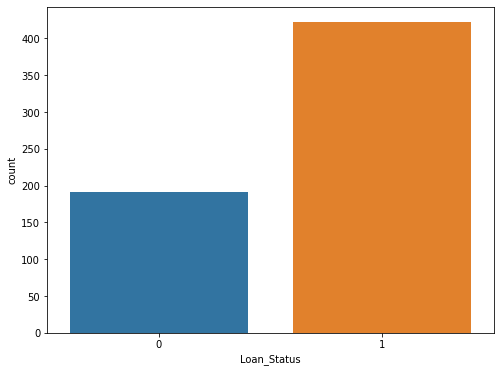

In [66]:
plt.figure(figsize=(8,6))
sn.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'Le taux de pret accordé est de : {yes}')
print(f'Le taux de pret refusé est de : {no}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


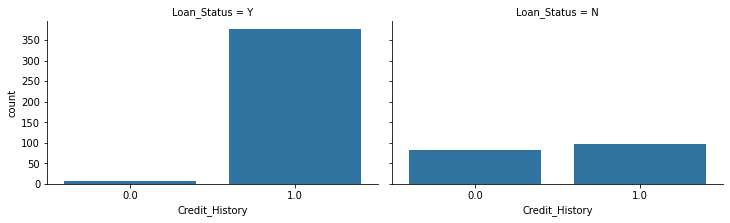

In [67]:
hist_grid = sn.FacetGrid(loan_data, col='Loan_Status', size=3.2, aspect = 1.6)
hist_grid.map(sn.countplot, 'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


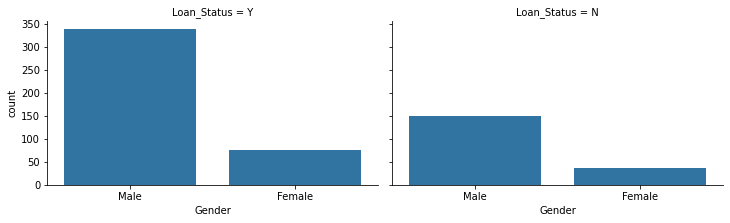

In [68]:
hist_grid = sn.FacetGrid(loan_data, col='Loan_Status', size=3.2, aspect = 1.6)
hist_grid.map(sn.countplot, 'Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


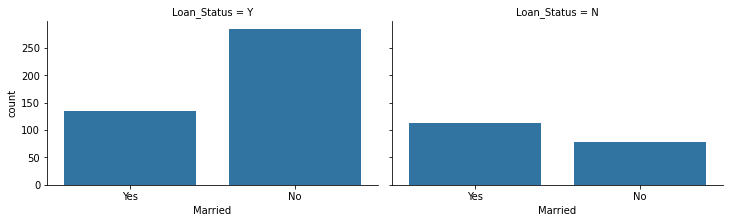

In [69]:
hist_grid = sn.FacetGrid(loan_data, col='Loan_Status', size=3.2, aspect = 1.6)
hist_grid.map(sn.countplot, 'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


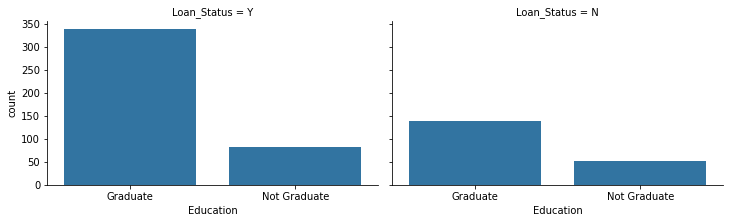

In [70]:
hist_grid = sn.FacetGrid(loan_data, col='Loan_Status', size=3.2, aspect = 1.6)
hist_grid.map(sn.countplot, 'Education')

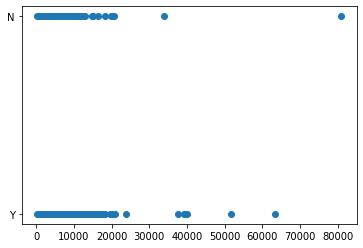

In [71]:
plt.scatter(loan_data['ApplicantIncome'], loan_data['Loan_Status'])

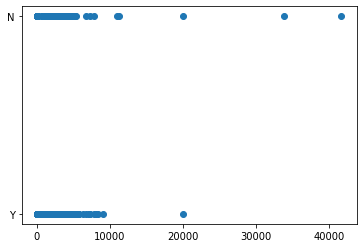

In [72]:
plt.scatter(loan_data['CoapplicantIncome'], loan_data['Loan_Status'])

In [73]:
loan_data.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [74]:
# data split
mymodel = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in mymodel.split(X,Y):
  X_train,X_test = X.iloc[train],X.iloc[test]
  Y_train,Y_test = Y.iloc[train],Y.iloc[test]

print('La taille de X_train est:', X_train.shape)
print('La taille de X_test est:', X_test.shape)
print('La taille de Y_train est:', Y_train.shape)
print('La taille de Y_test est:', Y_test.shape)

La taille de X_train est: (491, 11)
La taille de X_test est: (123, 11)
La taille de Y_train est: (491,)
La taille de Y_test est: (123,)


In [75]:
from sklearn import model_selection
#Creation des models 
models = {
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# La fonction de prediction
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'La precision du modele est: {acc}')

# La fonction d'application des modeles
def train_test_eva(models,X_train,Y_train,X_test,Y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,Y_train)
    accu(Y_test,model.predict(X_test))
    print('-'*30)

train_test_eva(models,X_train,Y_train,X_test,Y_test)

LogisticRegression :
La precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
La precision du modele est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La precision du modele est: 0.8455284552845529
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Deploiement
Je vais selectionner trois colonnes pour le deploiement à titre d'exemple

In [76]:
X2 = X[['Credit_History','Married','CoapplicantIncome']]
X2

,Credit_History,Married,CoapplicantIncome
0,1.0,0,0.0
1,1.0,1,1508.0
2,1.0,1,0.0
3,1.0,1,2358.0
4,1.0,0,0.0
...,...,...,...
609,1.0,0,0.0
610,1.0,1,0.0
611,1.0,1,240.0
612,1.0,1,0.0


In [77]:
# data split
mymodel = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in mymodel.split(X2,Y):
  X_train,X_test = X2.iloc[train],X2.iloc[test]
  Y_train,Y_test = Y.iloc[train],Y.iloc[test]

print('La taille de X_train est:', X_train.shape)
print('La taille de X_test est:', X_test.shape)
print('La taille de Y_train est:', Y_train.shape)
print('La taille de Y_test est:', Y_test.shape)

La taille de X_train est: (491, 3)
La taille de X_test est: (123, 3)
La taille de Y_train est: (491,)
La taille de Y_test est: (123,)


In [78]:
train_test_eva(models,X_train,Y_train,X_test,Y_test)

LogisticRegression :
La precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
La precision du modele est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
La precision du modele est: 0.8455284552845529
------------------------------


Je choisis la Logistic Regression parce qu'elle a la plus grande precision

In [79]:
Classifier = LogisticRegression()
Classifier.fit(X2,Y)

LogisticRegression()

In [81]:
# Sauvegarde du model pour le deployement
pickle.dump(Classifier,open('/content/drive/MyDrive/Colab Notebooks/fouille_de_donnees/Loan prediction/model.pkl','wb'))